In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# explanatory data analysis (EDA) 

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/Aya123-sys/CVIP-data_science/main/phase_1/normal_task/Hackathon_Ideal_Data.csv")
data.head()

,MONTH,STORECODE,QTY,VALUE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,P1,25,83,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE HAIR FALL RESCUE
1,M1,P1,6,22,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE INTENSE REPAIR
2,M1,P1,4,15,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE OXYGEN MOISTURE
3,M1,P1,15,60,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,L'OREAL INDIA,GARNIER,FRUCTIS
4,M1,P2,0,0,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,CLINIC PLUS,CLINIC PLUS


In [3]:
# list the columns name of our imported files 
columns =list(data.columns)
columns

['MONTH',
 'STORECODE',
 'QTY',
 'VALUE',
 'GRP',
 'SGRP',
 'SSGRP',
 'CMP',
 'MBRD',
 'BRD']

In [4]:
# give the explanation of each column name abbreviation 
explanation=pd.read_csv("https://raw.githubusercontent.com/Aya123-sys/CVIP-data_science/main/phase_1/normal_task/Hackathon_Mapping_File.csv")
explanation.loc[0:9,['Column Name','Column Description']]


,Column Name,Column Description
0,MONTH,"Month ID (M1, M2, M3)"
1,STORECODE,"STORE CODE (P1, P2, …, P10)"
2,QTY,Sales Unit
3,VALUE,Sales Value
4,GRP,Category
5,SGRP,Subcategory
6,SSGRP,Sub Sub Category
7,CMP,Company/Manufacturer
8,MBRD,Mother Brand
9,BRD,Brand


In [5]:
data.shape

(14260, 10)

In [6]:
print('There are {} distinct data at Group level'.format(data['GRP'].nunique()))
print('There are {} distinct data at sub-Group level'.format(data['SGRP'].nunique()))
print('There are {} distinct data at sub-sub-Group level'.format(data['SSGRP'].nunique()))
print('There are {} distinct data at Company level'.format(data['CMP'].nunique()))
print('There are {} distinct data at Mother-Brand level'.format(data['MBRD'].nunique()))
print('There are {} distinct data at Brand level'.format(data['BRD'].nunique()))

There are 80 distinct data at Group level
There are 177 distinct data at sub-Group level
There are 242 distinct data at sub-sub-Group level
There are 512 distinct data at Company level
There are 818 distinct data at Mother-Brand level
There are 1613 distinct data at Brand level


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14260 entries, 0 to 14259
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MONTH      14260 non-null  object
 1   STORECODE  14260 non-null  object
 2   QTY        14260 non-null  int64 
 3   VALUE      14260 non-null  int64 
 4   GRP        14260 non-null  object
 5   SGRP       14260 non-null  object
 6   SSGRP      14260 non-null  object
 7   CMP        14260 non-null  object
 8   MBRD       14260 non-null  object
 9   BRD        14260 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.1+ MB


In [8]:
print('the number of null value per column is ',data.isnull().sum())

the number of null value per column is  MONTH        0
STORECODE    0
QTY          0
VALUE        0
GRP          0
SGRP         0
SSGRP        0
CMP          0
MBRD         0
BRD          0
dtype: int64


In [9]:
print('the number of duplicated data in the transction dataset is :',data.duplicated().sum())

the number of duplicated data in the transction dataset is : 0


# data visualization

#  which months has the highest sales in terms of quantity sold ?

In [27]:
df=data.loc[:,['MONTH','QTY']]
number_sales_per_month= df.groupby(['MONTH']).sum()
number_sales_per_month


,QTY
MONTH,
M1,77042
M2,78658
M3,77515


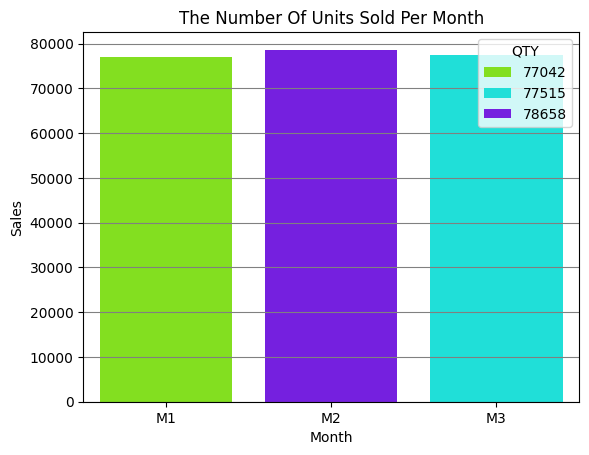

In [70]:
plt.grid(axis='y',color='gray')
num_categories = len(number_sales_per_month.index.unique())
palette = sns.color_palette('hsv', num_categories)
sns.barplot(x=number_sales_per_month.index,y=number_sales_per_month['QTY'],data=number_sales_per_month,hue='QTY',palette=palette)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('The Number Of Units Sold Per Month')
plt.show()

# determine which months has the highest sales in term of revenues

In [31]:
df1=data.loc[:,['MONTH','VALUE']]
revenues_per_month=df1.groupby("MONTH").sum()
revenues_per_month

,VALUE
MONTH,
M1,1389256
M2,1413538
M3,1396139


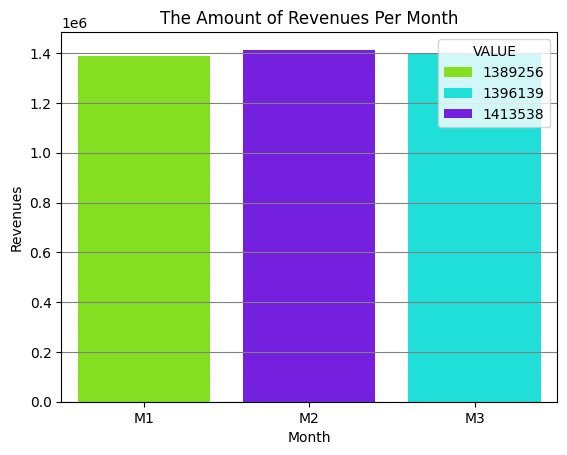

In [71]:
plt.grid(axis='y',color='gray')
num_categories = len(revenues_per_month.index.unique())
palette = sns.color_palette('hsv', num_categories)
sns.barplot(x=revenues_per_month.index,y=revenues_per_month['VALUE'],data=revenues_per_month,hue='VALUE',palette=palette)
plt.xlabel('Month')
plt.ylabel('Revenues')
plt.title('The Amount of Revenues Per Month')
plt.show()

 # which Store Sells the greatest number of Units?

In [68]:
df2=data.loc[:,['STORECODE','QTY']]
sales_per_store=df2.groupby('STORECODE').sum()
sales_per_store_sorted = sales_per_store.sort_values(by='QTY', ascending=True)
sales_per_store_sorted

,QTY
STORECODE,
P2,10483
P1,18526
P9,20904
P7,21114
P6,21178
P10,21323
P5,25993
P3,27602
P8,32003


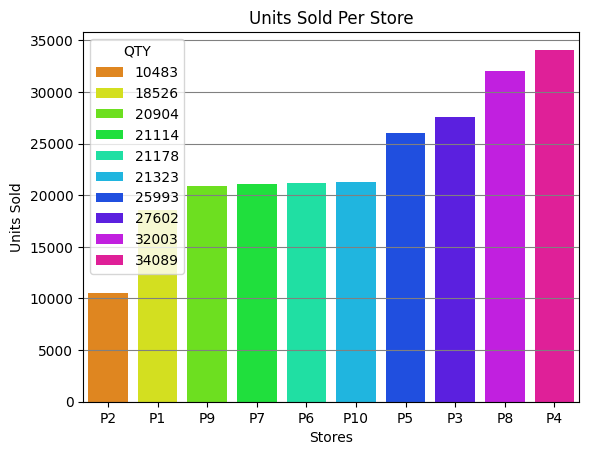

In [69]:
plt.grid(axis='y',color='gray')
num_categories = len(sales_per_store_sorted.index.unique())
palette = sns.color_palette('hsv', num_categories)
sns.barplot(x=sales_per_store_sorted.index,y=sales_per_store_sorted['QTY'],data=sales_per_store_sorted,hue='QTY',palette=palette)
plt.xlabel('Stores')
plt.ylabel('Units Sold')
plt.title('Units Sold Per Store')
plt.show()

 # which Store has the most revenues ?

In [42]:
df3=data.loc[:,['STORECODE','VALUE']]
revenues_per_store=df3.groupby('STORECODE').sum()
revenues_per_store_sorted = sales_per_store.sort_values(by='VALUE', ascending=True)
revenues_per_store_sorted

,VALUE
STORECODE,
P2,284024
P10,285820
P9,313426
P1,334710
P5,335086
P3,428550
P4,471566
P6,502627
P7,571136


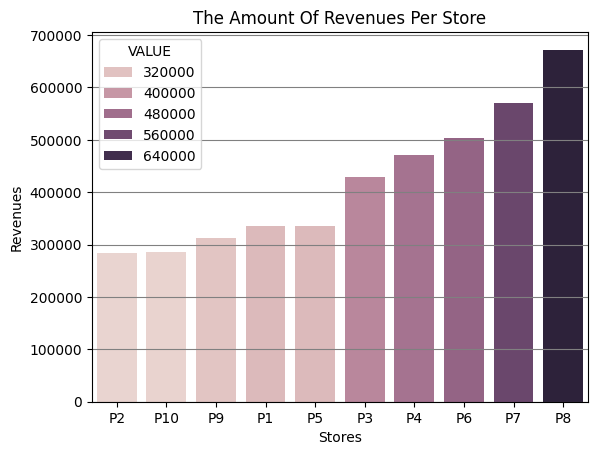

In [64]:
plt.grid(axis='y',color='gray')
num_categories = len(revenues_per_store_sorted.index.unique())
palette = sns.color_palette('hsv', num_categories)
sns.barplot(x=revenues_per_store_sorted.index,y=revenues_per_store_sorted['VALUE'],data=revenues_per_store_sorted,hue='VALUE')
plt.xlabel('Stores')
plt.ylabel('Revenues')
plt.title('The Amount Of Revenues Per Store')
plt.show()

# Which category sells the most items in general and by store?

In [52]:
df4=data.loc[:,['GRP','QTY']]
sales_per_category=df4.groupby('GRP').sum()
sales_per_category_sorted = sales_per_category.sort_values(by='QTY', ascending=True)
sales_per_category_sorted

,QTY
GRP,
MOSQUITO REPELLANT EQUIP(4/97),1
OLIVE OILS,1
AFTER SHAVE LOTIONS,4
SUGAR SUBSTITUTE (11/05),5
ANTISEPTIC CREAMS,6
...,...
DETERGENT CAKES/BARS,11819
SHAMPOO - BY SEGMENTS,17636
SPICES (03/04),25179


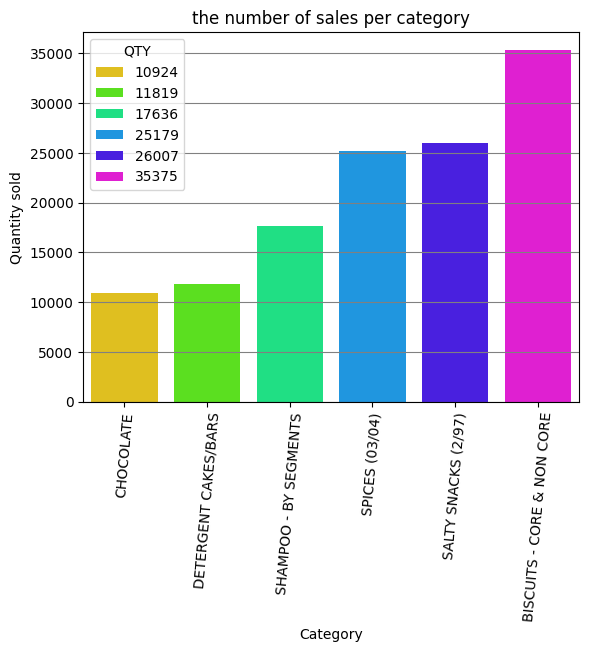

In [66]:
filtered_df = sales_per_category_sorted[sales_per_category_sorted['QTY'] > 10000]
plt.grid(axis='y',color='gray')
num_categories = len(filtered_df.index.unique())
palette = sns.color_palette('hsv', num_categories)
sns.barplot(x=filtered_df.index,y=filtered_df['QTY'],data=filtered_df,hue='QTY',palette=palette)
plt.xlabel('Category')
plt.xticks(rotation=85)  
plt.ylabel('Quantity sold')
plt.title('the number of sales per category')
plt.show()

# Which mother brand sells the most items in general and by store?

In [73]:
df5=data.loc[:,['MBRD','QTY']]
sales_per_mbrand=df5.groupby('MBRD').sum()
sales_per_mbrand_sorted = sales_per_mbrand.sort_values(by='QTY', ascending=True)
sales_per_mbrand_sorted

,QTY
MBRD,
VIMAL,0
EVER YUTH,0
DYNA,0
DWARKA,0
DUCK,0
...,...
YELLOW DIAMOND,4813
PARLE-G,4949
RIN,5716


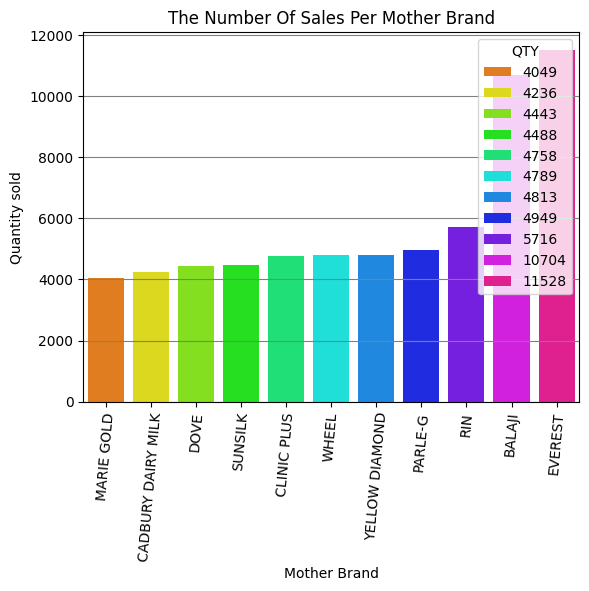

In [75]:
filtered_df1 =sales_per_mbrand_sorted[sales_per_mbrand_sorted['QTY'] > 4000]
plt.grid(axis='y',color='gray')
num_categories = len(filtered_df1.index.unique())
palette = sns.color_palette('hsv', num_categories)
sns.barplot(x=filtered_df1.index,y=filtered_df1['QTY'],data=filtered_df1,hue='QTY',palette=palette)
plt.xlabel('Mother Brand')
plt.xticks(rotation=85)  
plt.ylabel('Quantity sold')
plt.title('The Number Of Sales Per Mother Brand')
plt.show()

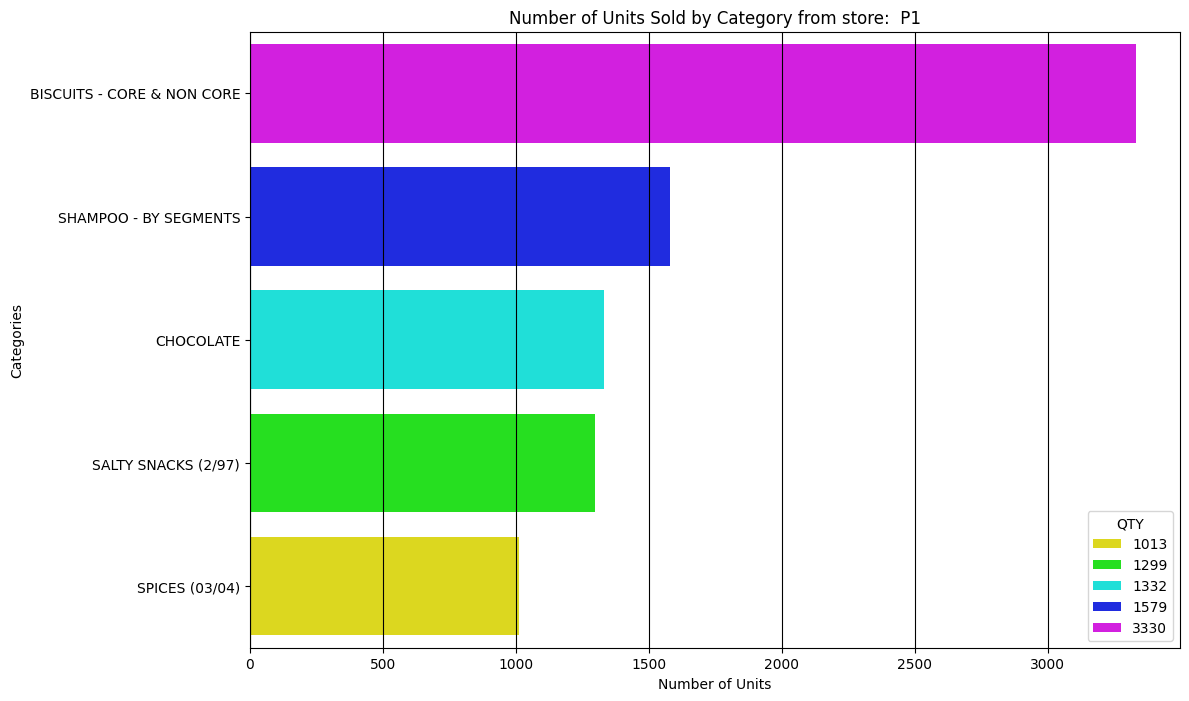

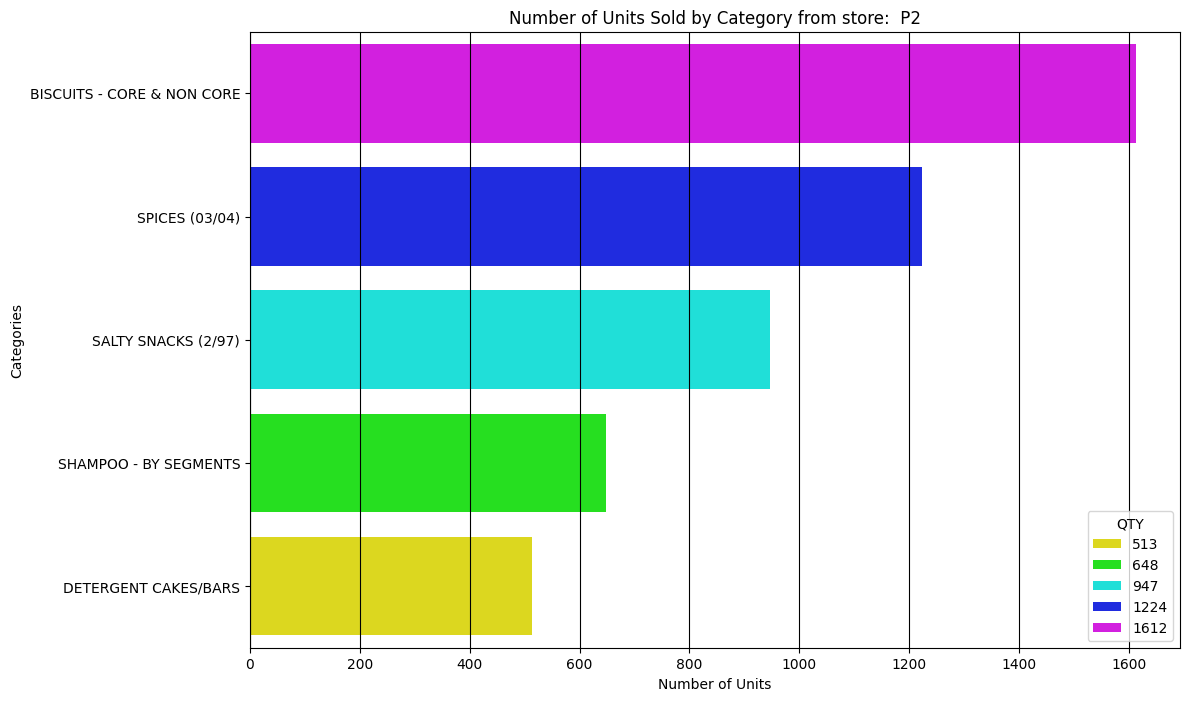

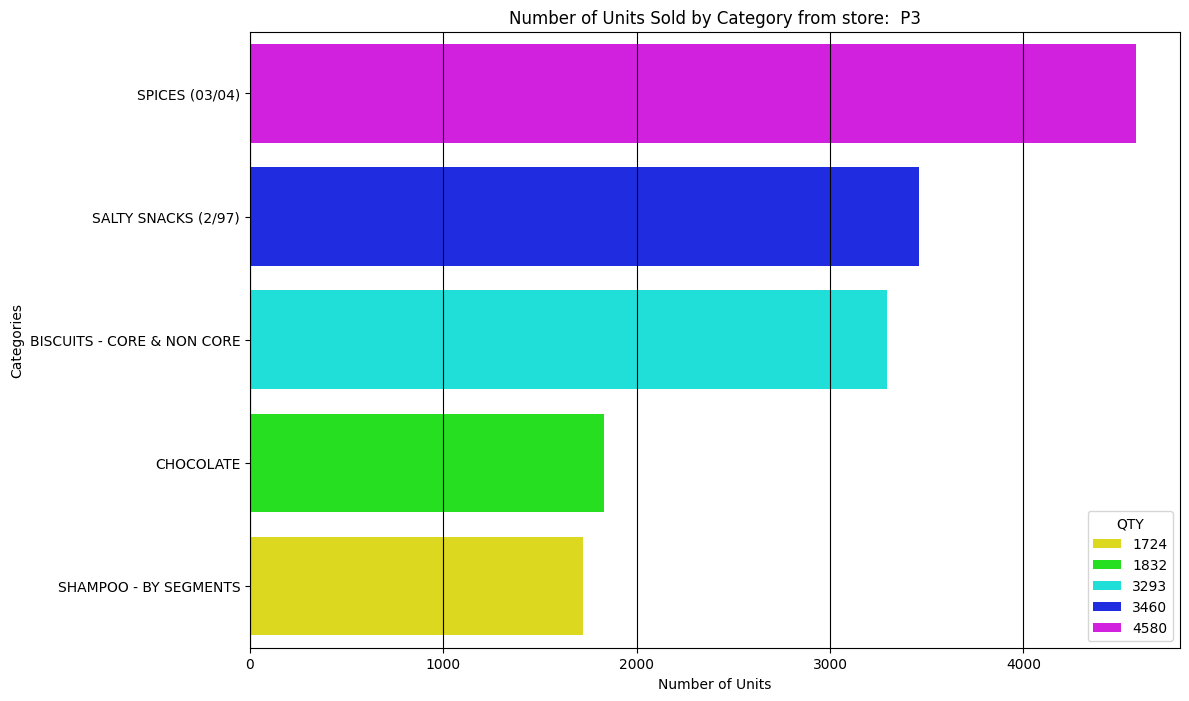

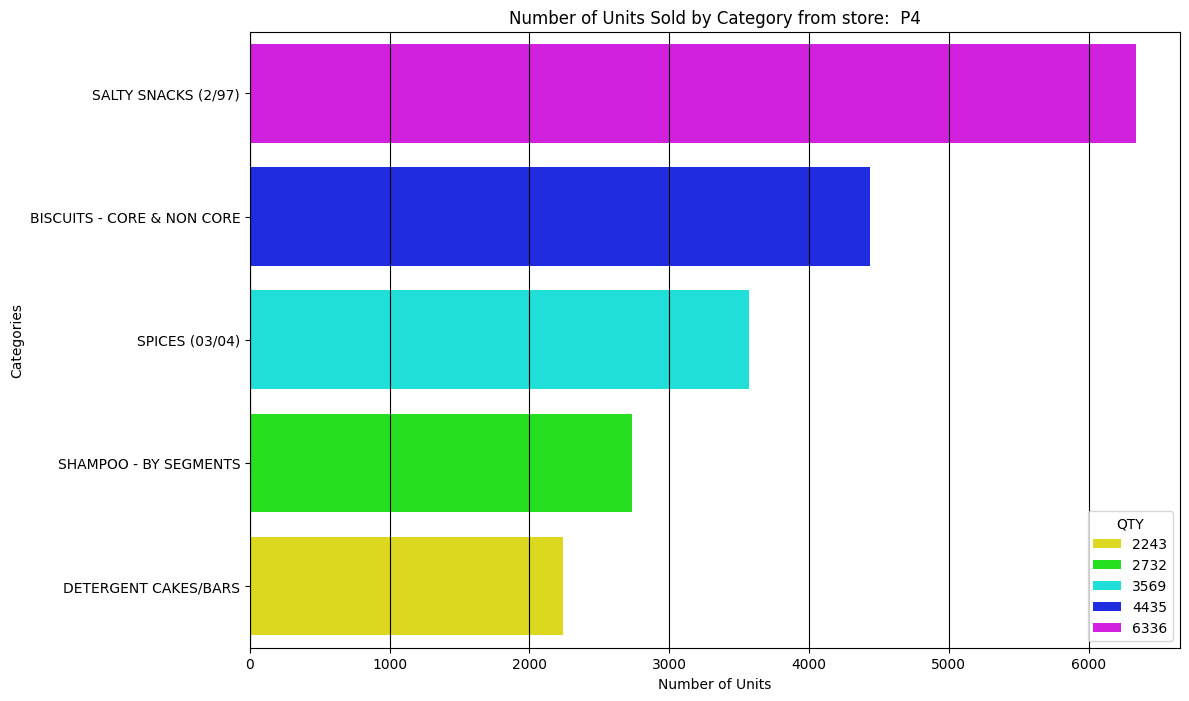

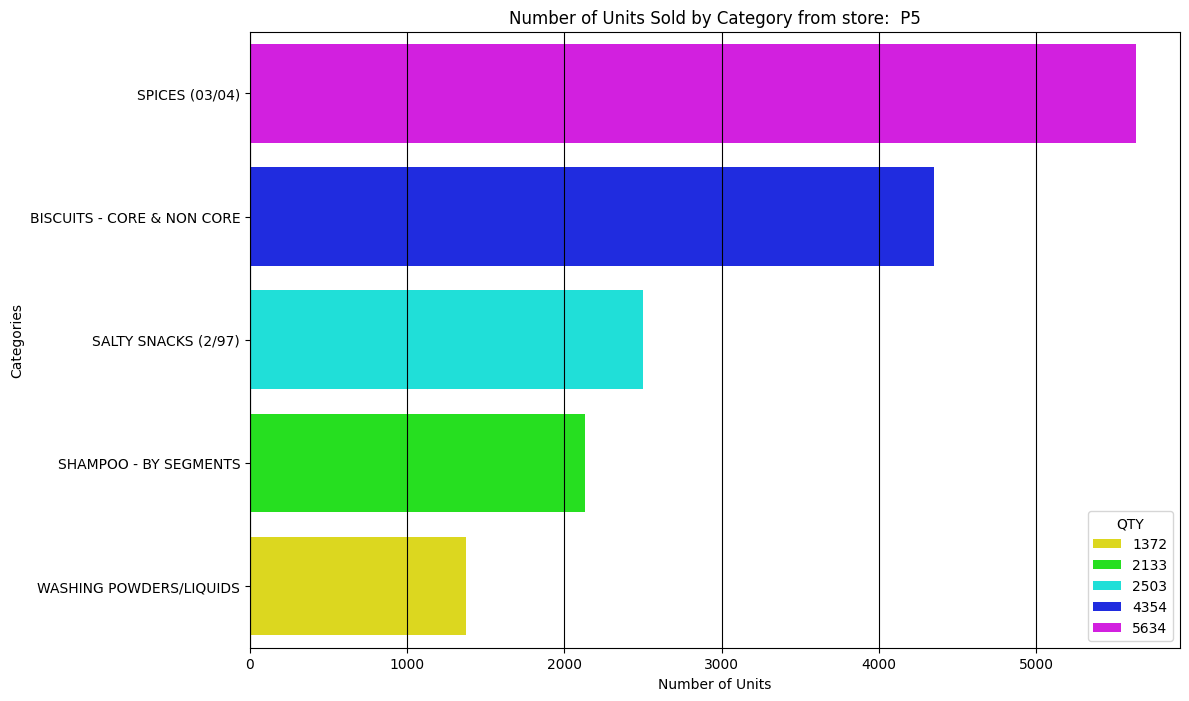

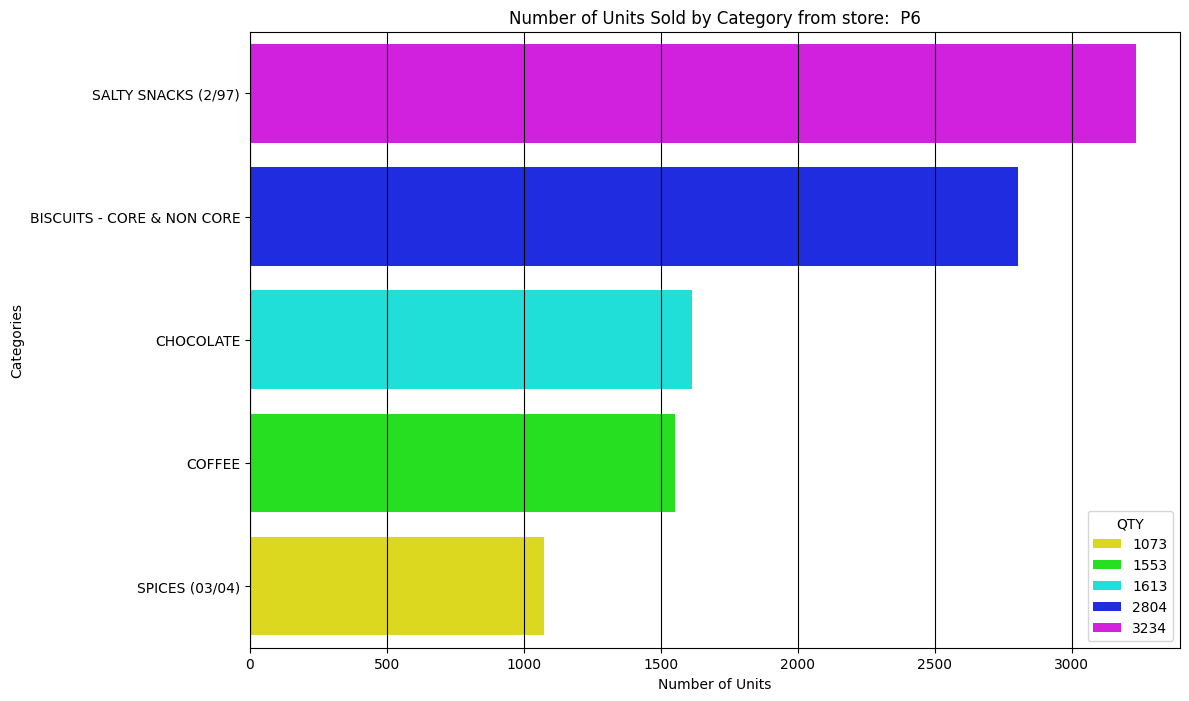

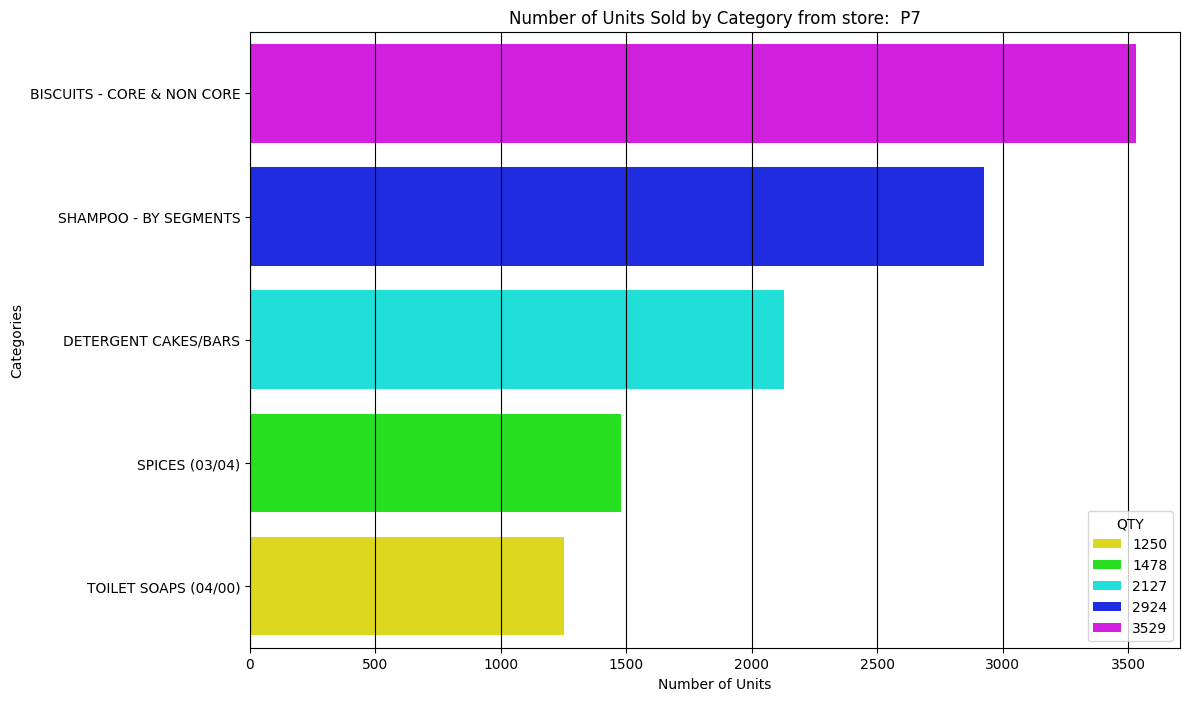

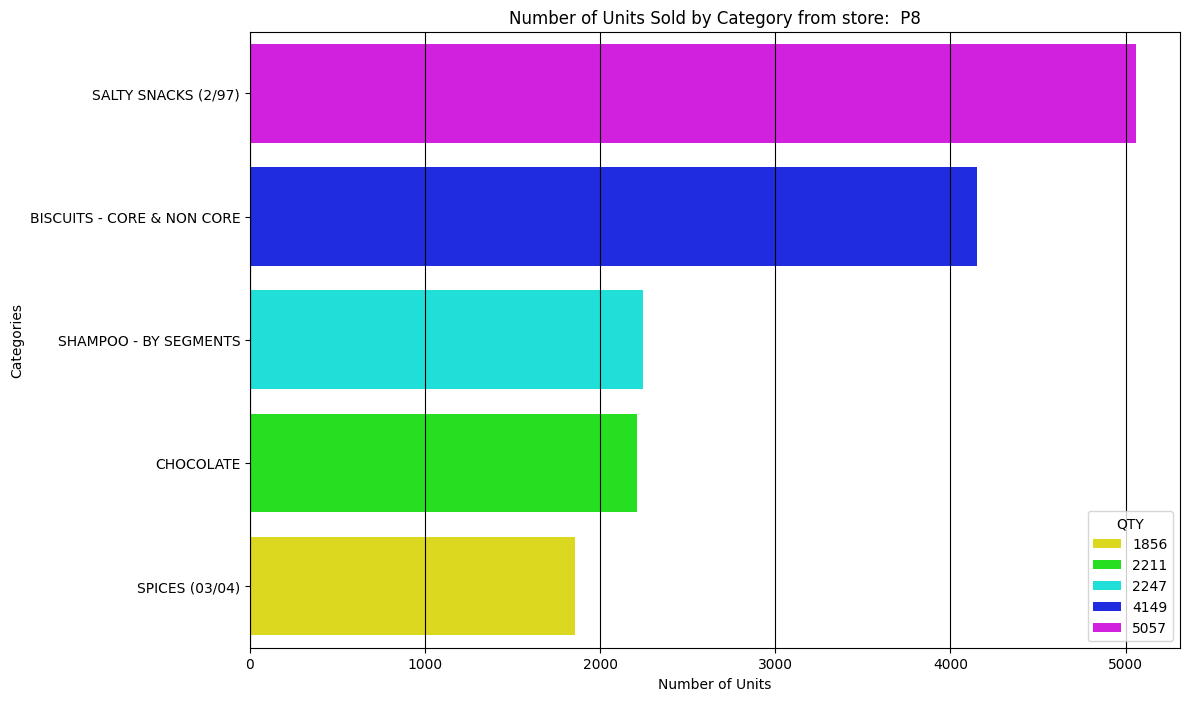

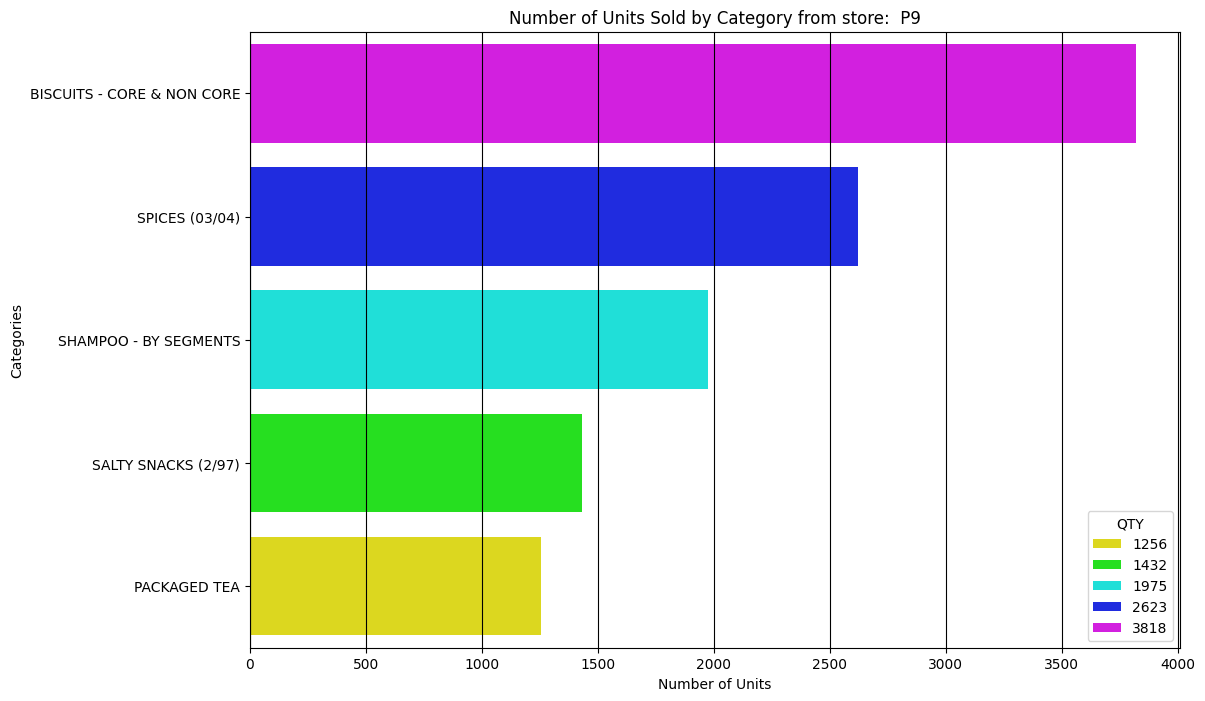

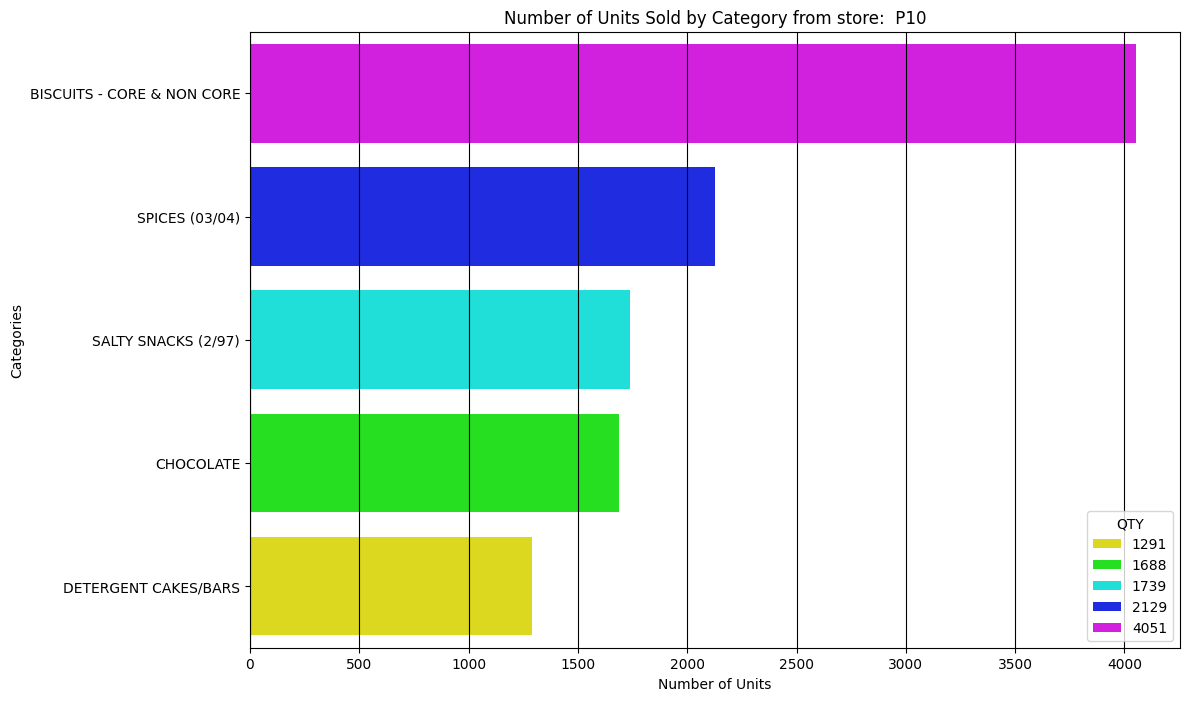

In [129]:
for i in data.STORECODE.unique():
    sample_data=data.loc[:,['STORECODE','GRP','QTY']]
    a=sample_data.loc[sample_data.STORECODE == i].groupby("GRP").sum()
    a=a.sort_values(by='QTY', ascending=False)
    a=a.iloc[0:5]
    plt.figure(figsize=(12,8))
    num_categories = 5
    palette = sns.color_palette('hsv', num_categories)
    sns.barplot(x='QTY',y=a.index,data=a ,palette=palette,hue='QTY')
    plt.title("Number of Units Sold by Category from store:  " + i)
    plt.xlabel("Number of Units")
    plt.ylabel("Categories")
    plt.grid(axis='x',color='black')
    
    

   
   